## 15.1 Context API를 사용한 전역 상태 관리 흐름 이해하기
- context API는 전역적으로 사용할 데이터가 있을 때 유용한 기능
- 예) 사용자 로그인정보, 애플리케이션 환경설정, 테마 등등
- 리액트 애플리케이션은 컴포넌트 간에 데이터를 props로 전달하기 때문에, 최상위 컴포넌트인 App의 state로 주로 관리
- 컴포넌트가 여러 개로 복잡할 땐, Context API를 사용해 여러 번 props로 전달하지 않고, **한 번**에 원하는 값을 받아와 사용

## 15.2 Context API 사용법 익히기
1. 새 context 만들기
- 새 Context를 만들 때는 createContext 함수를 사용, 파라미터에는 해당 context의 기본 상태를 지정
    ```js
    import {createContext} from 'react';
    const ColorContext = createContext({color:'black'}); 
    export default ColorContext;
    ```
2. consumer 사용하기
- Consumber 사이에 중괄호를 열어서 그 안에 함수{value=>()}를 넣었다.
- 이 패턴을 Function as a child 또는 Render Props라고 한다.
- 컴포넌트의 children이 있어야 할 자리에 일반 JSX 또는 문자열이 아닌 함수를 전달
    ```js
    // components/CorlorBox.js
    import React from 'react';
    import ColorContext from '../contexts/color/';

    const ColorBox = () => {
    return (
        <ColorContext.Consumer>
            {value => (
                <div
                    style = {{
                        width: '64px',
                        height: '64px',
                        background: value.color
                    }}
                />
            )}
        </ColorContext.Consumer>
    );
    };

    export default ColorBox;
    ```
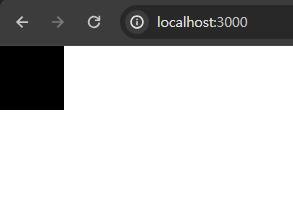

3. provider
- Provider를 사용하면 Context의 value를 바꿀 수 있다. 
- Provider는 바꿀 값(value)를 명시해 줘야 한다.
    ```js
    import React from 'react';
    import ColorBox from './components/ColorBox';
    import ColorContext from './contexts/color';

    const App = () => {
    return (
        // 오류발생 코드<ColorContext.Provider}>
        <ColorContext.Provider value={{color:'red'}}>
        <div>
            <ColorBox />
        </div>
        </ColorContext.Provider>
    );
    };

    export default App;
    ```
    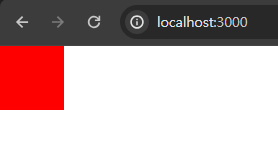



## 15.3 동적 Context 사용하기
1. context 파일 수정
- Context의 value에는 무조건 상태 값만 있어야 하는 것은 아니다. 함수를 전달해 줄 수도 있다.
    ```js
    import React, { createContext, useState } from "react";

    const ColorContext = createContext({
        state: { color: "black", subcolor: "red" },
        actions: { setColor: () => {}, setSubcolor: () => {} },
    });

    const ColorProvider = ({ children }) => {
        const [color, setColor] = useState("black");
        const [subcolor, setSubcolor] = useState("red");

        const value = {
            state: { color, subcolor },
            actions: { setColor, setSubcolor },
        };

        return (
            <ColorContext.Provider value={value}>{children}</ColorContext.Provider>
        );
    };

    // const Colorconsumer = ColorContext.Consumer와 같은 의미
    const { Consumer: ColorConsumer } = ColorContext;

    // ColorProvider와 ColorConsumber 내보내기
    export { ColorProvider, ColorConsumer };

    export default ColorContext;
    ```

2. 새로워진 context를 반영
```js
import React from 'react';
import ColorBox from './components/ColorBox';
import { ColorProvider } from "./contexts/color";

const App = () => {
  return (
    <ColorProvider >
      <div>
        <ColorBox />
      </div>
    </ColorProvider>
  );
};

export default App;
```
---
```js 
import React from "react";
import { ColorConsumer } from "../contexts/color";

const ColorBox = () => {
    return (
        <ColorConsumer>
            {({state}) => (
                <>
                    <div
                        style={{
                            width: "64px",
                            height: "64px",
                            background: state.color,
                        }}
                    />
                    <div
                        style={{
                            width: "32px",
                            height: "32px",
                            background: state.subcolor,
                        }}
                    />
                </>
            )}
        </ColorConsumer>
    );
};

export default ColorBox;
```
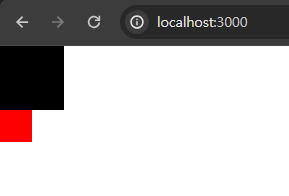

3. 색상 선택 컴포넌트 만들기
```js
const colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"];

const SelectColors = () => {
    return (
        <div>
            <h2>색상을 선택하세요</h2>
            <div style={{ display:'flex'}}>
                {colors.map(color => (
                    <div
                        key={color}
                        style={{
                            background: color,
                            width: "24px",
                            height: "24px",
                            curor: "pointer",
                        }}
                    />
                ))}
            </div>
            <hr />
        </div>
    );
};

export default SelectColors;
```
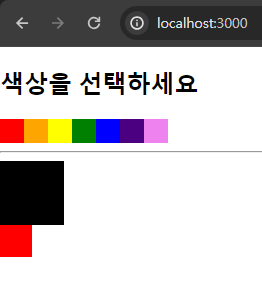

- 색상을 클릭하면 색상이 바뀌게 수정
```js
import React from "react";
import { ColorConsumer } from "../contexts/color";

const colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"];

    const SelectColors = () => {
    return (
        <div>
        <h2>색상을 선택하세요</h2>
        <ColorConsumer>
            {({ actions }) => (
                <div style={{ display: "flex" }}>
                    {colors.map((color) => (
                        <div
                            key={color}
                            style={{
                                background: color, width: "24px", height: "24px", curor: "pointer"}}
                            onClick={() => actions.setColor(color)}
                            onContextMenu={(e) => {
                                e.preventDefault();
                                actions.setSubcolor(color);
                            }}
                        />
                    ))}
                </div>
            )}
        </ColorConsumer>
        <hr />
        </div>
    );
};

export default SelectColors;
```
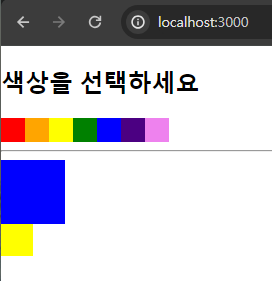


## 15.4 consumer 대신 Hook 또는 static contextType 사용하기
1. useContext Hook 사용
- 리액트 내장 useContext Hook 사용
    ```js
    import React, { useContext } from "react";
    import ColorContext from "../contexts/color";

    const ColorBox = () => {
        const { state } = useContext(ColorContext);
        return (
            <>
                <div
                    style={{
                        width: "64px",
                        height: "64px",
                        background: state.color,
                    }}
                />
                <div
                    style={{
                        width: "32px",
                        height: "32px",
                        background: state.subcolor,
                    }}
                />
            </>
        );
    };
    export default ColorBox;
    ```

2. static contextType 사용
- 클래스형 컴포넌트에서 Context를 쉽게 쓰고 싶으면 static contextType을 정의하는 방법이 있다.
- SelectColors 컴포넌트를 클래스형으로 변환
- static contextType을 정의하면 클래스 메서드에도 context에 넣어 둔 함수를 호출할 수 있다는 장점이 있ㄷ다.
- 단점은 한 클래스에서 하나의 context밖에 사용하지 못한다.
    ```js
    import React, { Component } from "react";
    import ColorContext from "../contexts/color";

    const colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"];

    class SelectColors extends Component {
        static contextType = ColorContext;

        handleSetColor = (color) => {
            this.context.actions.setColor(color);
        };

        handleSetSubColor = (subcolor) => {
            this.context.actions.setSubcolor(subcolor);
        };

        render() {
            return (
                <div>
                    <h2>색상을 선택하세요</h2>
                    <div style={{ display: "flex" }}>
                    {colors.map((color) => (
                        <div
                            key={color}
                            style={{
                                background: color, width: "24px", height: "24px", cursor: "pointer"}}
                            onClick={() => this.handleSetColor(color)}
                            onContextMenu={(e) => {
                                e.preventDefault();
                                this.handleSetSubColor(color);
                            }}
                        />
                    ))}
                    </div>
                    <hr />
                </div>
            );
        }
    }

    export default SelectColors;
    ```


# 15.5 정리
- 기존에는 컴포넌트 간에 상태를 교류해야 할 때 무조건 부모 -> 자식 흐름으로 props를 통해 전달
- Context API를 통해 더 쉽게 교류 할 수 있게 됨
- 프로젝트 구조가 간단하고 다루는 상태의 종류가 많지 않다면 굳이 context를 사용할 필요 없다
    - 하지만 전역적으로 사용되는 상태가 있고 컴포넌트의 개수가 많으면 사용을 권장